# Pandas

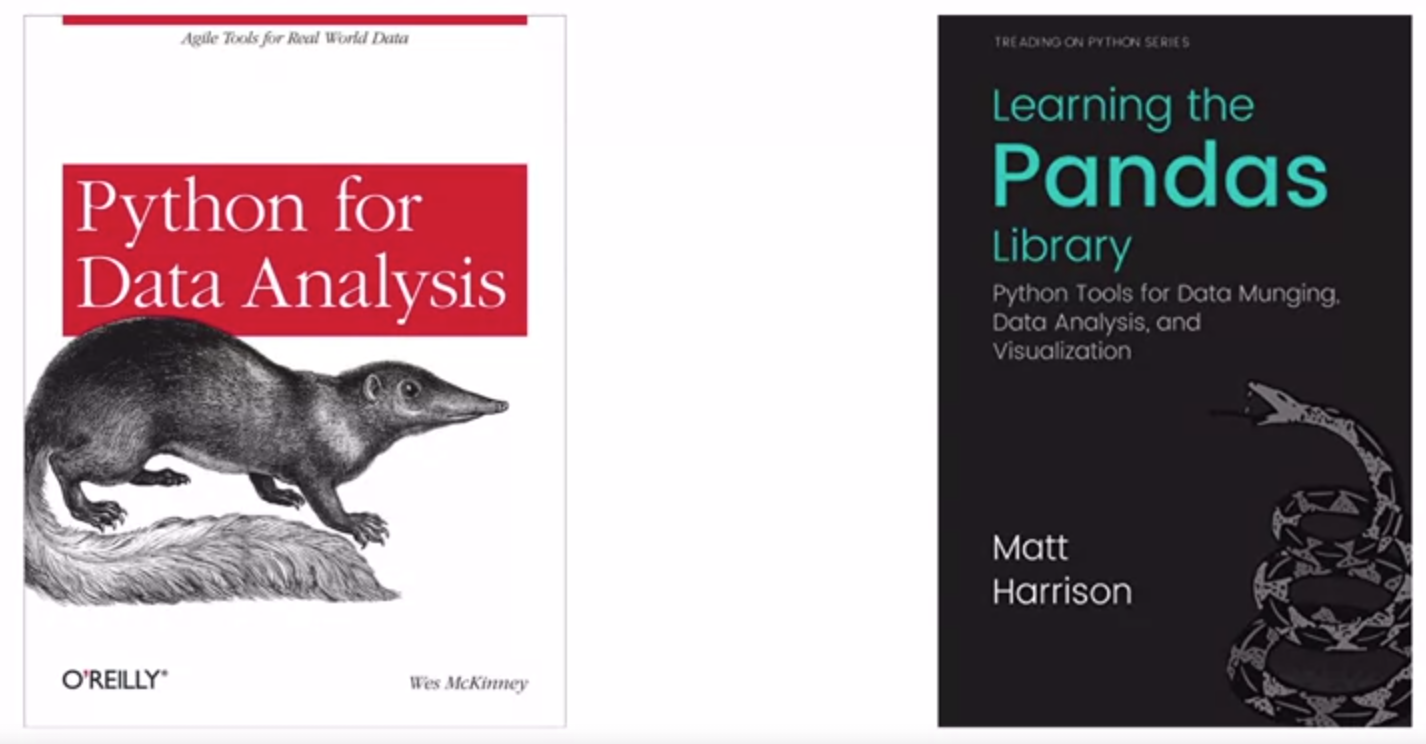

Pandas es una libreria de uso extendido en python sobretodo en el area de ciencias de datos, cuya principal capacidad es la implementacion y manipulacion de objetos llamados <span class="mark">DataFrames</span>. Estos no son otra cosa que arreglos multidimensionales con etiquetas para filas y columnas y la capacidad de almacenar datos heterogeneos. Adicional a ello, pandas ofrece una gran cantidad de operaciones que nos permiten manipular los DataFrames a nuestro antojo. Aparte de los DataFrames, pandas permite trabajar con otro tipo de datos conocidos como Series, las cuales se discutiran mas adelante.

In [1]:
# importando pandas
import pandas
pandas.__version__

'1.0.5'

In [2]:
# alias de pandas
import pandas as pd

In [ ]:
pd.<TAB>

In [3]:
pd?

## Objetos de pandas

Los objetos de pandas se pueden pensar como arreglo de numpy pero con etiquetas en lugar de indices, lo que porporciona mayor flexibilidad y variedad entre los tipos de objetos que se pueden crear.

### Series en pandas

Una objeto tipo <span class="mark">Series</span> de pandas es un arreglo unidimensional de datos indexados.

In [4]:
# A partir de una lista
datos = pd.Series([1.3, 2.8, 3.4, 4.7, 5.9])
print(datos)

0    1.3
1    2.8
2    3.4
3    4.7
4    5.9
dtype: float64


In [5]:
type(datos)

pandas.core.series.Series

In [6]:
# Accediendo a los valores de un objeto Series
print(datos.values)

[1.3 2.8 3.4 4.7 5.9]


In [7]:
# Accediendo a los indices
print(datos.index)
print(type(datos.index))

RangeIndex(start=0, stop=5, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [8]:
# Accediendo a los datos
print(datos[0])
print(datos[1: 3])

1.3
1    2.8
2    3.4
dtype: float64


Hasta el momento parece ser que un objeto tipo Series es lo mismo que un arreglo unidimensional de numpy, sin embargo, es importante notar que los indices de los arreglos de numpy se declaran implicitamente, mientras que los de las series se pueden declarar explicitamente.

In [9]:
datos = pd.Series([1.3, 2.8, 3.4, 4.7, 5.9], index = ['a', 'b', 'c', 'd', 'e'])
print(datos)

a    1.3
b    2.8
c    3.4
d    4.7
e    5.9
dtype: float64


In [10]:
# Accediendo a los indices
print(datos.index)
print(type(datos.index))

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [11]:
# Accediendo a los datos
print(datos[0])
print(datos['a'], end = "\n"*2)
print(datos[1: 3])
print(datos['b': 'c']) # El extremo si se toma en cuenta

1.3
1.3

b    2.8
c    3.4
dtype: float64
b    2.8
c    3.4
dtype: float64


In [12]:
# otro ejemplo
datos2 = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
print(datos2)

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64


In [13]:
# Construyendo una serie desde un diccionario
dic_poblacion = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
poblacion = pd.Series(dic_poblacion)
poblacion

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [14]:
print(dic_poblacion["California"])
print(poblacion['California'])

38332521
38332521


In [15]:
# Los diccionarios no permiten slicing, las series si
print(poblacion['California':'Florida'])

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


En resumen, para construir un serie de pandas, seguiremos el siguiente esquema:
    
           pd.Series(datos, index = index)

Recordar que index es opcional.

In [16]:
# Definiendo tres series a partir de objetos diferente
serie1 = pd.Series([1, 7, 9, 8, 2])
serie2 = pd.Series({"casa": 45, "salon": 78, "colegio": 100})
serie3 = pd.Series(np.arange(1, 4), index = [1, 2, 3])
serie4 = pd.Series(5, index = [1, 2, 3])
serie5 = pd.Series({"casa": 45, "salon": 78, "colegio": 100}, index = ["casa", "colegio"])

In [17]:
print(serie1, end = "\n"*2)
print(serie2, end = "\n"*2)
print(serie3, end = "\n"*2)
print(serie4, end = "\n"*2)
print(serie5, end = "\n"*2)

0    1
1    7
2    9
3    8
4    2
dtype: int64

casa        45
salon       78
colegio    100
dtype: int64

1    1
2    2
3    3
dtype: int32

1    5
2    5
3    5
dtype: int64

casa        45
colegio    100
dtype: int64



### DataFrames

Estos objetos se pueden pensar como arreglo bidimensional con flexibilidad de etiquetado en ambas dimensiones: filas y columnas

<span class="mark">Dataframe desde una serie</span>

In [22]:
serie = pd.Series([1, 2, 3], index = ["a", "b", "c"])
df = pd.DataFrame(serie, columns =["numeros"])
df

,numeros
a,1
b,2
c,3


In [24]:
diccionario = [{'a': 1, 'b':2}]
df = pd.DataFrame(diccionario)
df

,a,b
0,1,2


<span class="mark">DataFrame desde una lista de diccionarios</span>

In [25]:
diccionarios = [{'a': 1, 'b':2}, {'a': 7, 'b': 10}]
df = pd.DataFrame(diccionarios)
df

,a,b
0,1,2
1,7,10


In [26]:
diccionarios = [{'a': 1, 'b':2}, {'b': 7, 'c': 10}]
df = pd.DataFrame(diccionarios)
df

,a,b,c
0,1.0,2,NaN
1,NaN,7,10.0


<span class="mark">DataFrame desde una serie de diccionarios</span>

In [27]:
dic_poblacion = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
poblacion = pd.Series(dic_poblacion)
df = pd.DataFrame(poblacion, columns = ["poblacion"])
df

,poblacion
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


<span class="mark">Dataframes de dos dimensiones</span>

In [28]:
dic_poblacion = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
poblacion = pd.Series(dic_poblacion)

In [29]:
dic_area = {'California': 423967, 'Texas': 695662, 'New York': 141297,
            'Florida': 170312, 'Illinois': 149995}
area = pd.Series(dic_area)

In [30]:
df = pd.DataFrame({"poblacion":poblacion, "area":area})
df

,poblacion,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [33]:
# Otro ejemplo
df =pd.DataFrame(np.random.rand(3, 3), columns = ["a", "b", "c"], index = ["p", "q", "r"])
df["casa"] = 5
df

,a,b,c,casa
p,0.230165,0.062217,0.964352,5
q,0.889471,0.354894,0.076592,5
r,0.377645,0.290445,0.113727,5


Operadores <span class="mark">.index</span> y <span class="mark">.columns</span>

In [34]:
# Obteniendo acceso a las etiquetas de filas, tambien llamadas indices
print(df.index)

Index(['p', 'q', 'r'], dtype='object')


In [35]:
# Obteniendo a la etiquetas de columna 
print(df.columns)

Index(['a', 'b', 'c', 'casa'], dtype='object')


## Indexacion y seleccion de Datos

### Seleccion de datos en series

In [36]:
import pandas as pd
serie = pd.Series([1, 4, 7, -5, -2], index = ["01", "02", "03", "04", "05"])
serie

01    1
02    4
03    7
04   -5
05   -2
dtype: int64

In [37]:
# Llamada por indice explicito
serie["02"]

4

In [38]:
# Slicing con indice explicito
serie["02":"04"]

02    4
03    7
04   -5
dtype: int64

In [39]:
# Slicing con indice implicito
serie[1: 4]

02    4
03    7
04   -5
dtype: int64

In [40]:
# verificar la existencia de los datos
print("04" in serie)
print("07" in serie)

True
False


In [41]:
# Indices de la serie
print(serie.keys())
print(serie.index)

Index(['01', '02', '03', '04', '05'], dtype='object')
Index(['01', '02', '03', '04', '05'], dtype='object')


In [42]:
# Valores de la serie
print(serie.values)

[ 1  4  7 -5 -2]


In [45]:
# Conviritiendo la serie en diccionario
dict(serie.items())

{'01': 1, '02': 4, '03': 7, '04': -5, '05': -2}

In [46]:
# Masking con series para filtrar datos
serie[(serie > 0) & (serie < 7)]

01    1
02    4
dtype: int64

<span class="mark">Modificando</span> los valores de la serie (Los indices son inmutables):

In [47]:
serie["03"] = 11
print(serie)

01     1
02     4
03    11
04    -5
05    -2
dtype: int64


### Seleccion de datos en DataFrames

In [54]:
area = pd.Series({'California': 423967, 'Texas': 695662,'New York': 141297, 
                  'Florida': 170312, 'Illinois': 149995})
poblacion = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 
                 'Florida': 19552860, 'Illinois': 12882135})
df = pd.DataFrame({'area':area, 'poblacion':poblacion})
df

,area,poblacion
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [55]:
# Seleccionar columna area
df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [56]:
df.area 

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [57]:
# Agregando un a nueva columna
df['densidad'] = df['poblacion']/df['area']
df

,area,poblacion,densidad
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [58]:
# Otro ejemplo
df = pd.DataFrame(np.random.rand(4, 5), columns = ["a", "b", "c", "d", "e"], index = ["A", "B", "C", "D"])
df

,a,b,c,d,e
A,0.145659,0.627100,0.851946,0.920213,0.551977
B,0.417480,0.154567,0.700932,0.272887,0.332577
C,0.450349,0.488282,0.756699,0.247917,0.154615
D,0.583603,0.149687,0.785353,0.410545,0.186239


In [59]:
# df transpuesta
df.T

,A,B,C,D
a,0.145659,0.417480,0.450349,0.583603
b,0.627100,0.154567,0.488282,0.149687
c,0.851946,0.700932,0.756699,0.785353
d,0.920213,0.272887,0.247917,0.410545
e,0.551977,0.332577,0.154615,0.186239


In [60]:
# Obteniendo solo los valores
df.values

array([[0.14565871, 0.62710043, 0.8519463 , 0.92021343, 0.55197696],
       [0.41747976, 0.15456671, 0.70093186, 0.27288706, 0.33257735],
       [0.45034874, 0.48828237, 0.75669915, 0.24791748, 0.15461521],
       [0.58360308, 0.14968659, 0.78535345, 0.41054501, 0.18623929]])

In [61]:
# Obteniendo la primera fila de df
df.values[0]

array([0.14565871, 0.62710043, 0.8519463 , 0.92021343, 0.55197696])

#### .loc  y .iloc

In [62]:
df

,a,b,c,d,e
A,0.145659,0.627100,0.851946,0.920213,0.551977
B,0.417480,0.154567,0.700932,0.272887,0.332577
C,0.450349,0.488282,0.756699,0.247917,0.154615
D,0.583603,0.149687,0.785353,0.410545,0.186239


In [63]:
# Accediendo al valor en la posicion (b A)
df.values[0, 1]

0.6271004299244849

In [64]:
# Usando df.loc. .loc espera el nombre de la fila
df.loc['A']

a    0.145659
b    0.627100
c    0.851946
d    0.920213
e    0.551977
Name: A, dtype: float64

In [67]:
df.loc['A', 'b']

0.6271004299244849

In [68]:
# Secciones del df
df.loc[:"C", :"c"]

,a,b,c
A,0.145659,0.627100,0.851946
B,0.417480,0.154567,0.700932
C,0.450349,0.488282,0.756699


In [69]:
# Usando .iloc. Iloc espera los indices de las filas por numero (implicito)
df.iloc[0]

a    0.145659
b    0.627100
c    0.851946
d    0.920213
e    0.551977
Name: A, dtype: float64

In [70]:
df.iloc[0, 1]

0.6271004299244849

In [72]:
# Esto no se puede
df.iloc[0, 'b']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [73]:
# Esto si se puede
df.loc["A", 'a']

0.14565870804290626

In [74]:
df

,a,b,c,d,e
A,0.145659,0.627100,0.851946,0.920213,0.551977
B,0.417480,0.154567,0.700932,0.272887,0.332577
C,0.450349,0.488282,0.756699,0.247917,0.154615
D,0.583603,0.149687,0.785353,0.410545,0.186239


In [75]:
df.loc[df["a"] > 0.2, ["b", "e"]]

,b,e
B,0.154567,0.332577
C,0.488282,0.154615
D,0.149687,0.186239


In [76]:
# Modificando valores
df.iloc[0, 0] = 0.7
df

,a,b,c,d,e
A,0.700000,0.627100,0.851946,0.920213,0.551977
B,0.417480,0.154567,0.700932,0.272887,0.332577
C,0.450349,0.488282,0.756699,0.247917,0.154615
D,0.583603,0.149687,0.785353,0.410545,0.186239


In [77]:
df.loc['A', 'b'] = 0.88
df

,a,b,c,d,e
A,0.700000,0.880000,0.851946,0.920213,0.551977
B,0.417480,0.154567,0.700932,0.272887,0.332577
C,0.450349,0.488282,0.756699,0.247917,0.154615
D,0.583603,0.149687,0.785353,0.410545,0.186239


In [82]:
# Ejemplo usando masking
df['a']

A    0.700000
B    0.417480
C    0.450349
D    0.583603
Name: a, dtype: float64

## <span class="burk">MINIDESAFIO</span>

**1.** Cree un diccionario a partir de la siguiente lista de tuplas que relaciona la posicion en una empresa con los salarios percibidos:

        salarios = [("operario", 1200000), ("coordinador", 2000000), ("director", 2800000), ("gerente", 3500000), 
        ("CEO", 5200000)] 

**2.** Con el diccionario creado anteriormente, cree una serie de pandas y solicite los salarios del gerente y del CEO.

**3.** A partir del punto dos, cree un DataFrame nombrando la columna como sueldo. Si no proporciona ningun index, pandas tomara como index a los keys del diccionario. Solicite el sueldo del operario y del director usando atributos .loc y .iloc.

**4.** Filtre el DataFrame del punto 3 de tal forma que solo se muestren los empleados con sueldo superiores a los 2000000.

## Operando sobre datos en pandas

Lo primero que debemos tener en cuenta es que como pandas s ebasa en arrays de numpy, las ufuncs de numpy se pueden aplicar a objetos definidos en pandas

In [ ]:
# Con una serie
array = np.array([10, 2, 35, 41, 5, 6])
array

In [ ]:
serie = pd.Series(array)
serie

In [ ]:
# aplicando una ufunc sobre la serie
exp = np.exp(serie)
exp

In [ ]:
# Con una Dataframe
df = pd.DataFrame(np.random.rand(5, 5))
df

In [ ]:
# aplicando una ufunc sobre el dataframe
exp = np.exp(df)
exp

Como se pudo observar, las ufuncs para operaciones unarias conservan los indices y las columnas.

Para operaciones binarias, pandas alineara los indices por nombre, de tal forma que si alguno de estos no coincide, sera tomada como un valor NaN.

In [ ]:
# ufuncs unarias con series
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                    'California': 423967}, name='area')
poblacion = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [ ]:
poblacion/area

In [ ]:
# Otro ejemplo
serie1 = pd.Series([1, 2, 3])
serie2 = pd.Series([5, 7, 2, 7])
serie1 + serie2

In [ ]:
# ufuncs binarias con dataframes
df1 = pd.DataFrame(np.random.randint(1, 100, 30).reshape(5, 6))
df2 = pd.DataFrame(np.random.randint(-50, 50, 30).reshape(6, 5))

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1+df2

In [ ]:
df1**df2

## Manejando Datos perdidos

In [ ]:
valores = np.array([1, 2, np.NaN, 3])
valores

Cualquier operacion con nan dara otro nan, por ello es mejor trabajarlos con cuidado

<span class="mark">Detectando valores null</span>

In [ ]:
serie = pd.Series(valores)
serie

In [ ]:
serie.isnull()

In [ ]:
serie.notnull()

In [ ]:
serie[serie.notnull()]

<span class="mark">Eliminando valores null</span>

In [ ]:
serie

In [ ]:
serie.dropna()

In [ ]:
df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
df

In [ ]:
# por defecto dropna elimina las filas con NaN
df.dropna()

In [ ]:
# con axis se pueden eliminar las columnas
df.dropna(axis = 1)

In [ ]:
# columns = 1, rows = 0
df.dropna(axis = 'rows')

In [ ]:
df[3] = np.nan
df

In [ ]:
df.dropna(axis = 'columns', how='all')

<span class="mark">Rellenando valores null</span>

In [ ]:
serie = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
serie

In [ ]:
serie.fillna(0)

In [ ]:
serie.fillna(method ='ffill')

In [ ]:
serie.fillna(method ='bfill')

In [ ]:
df

In [ ]:
df.fillna(0)

In [ ]:
df.fillna(method = 'ffill', axis = 1)

In [ ]:
df.fillna(method = 'ffill', axis = 0)

## <span class="burk">MINIDESAFIO</span>

**1.** Cree un dataframe usando el siguiente array: 
        
        np.random.randint(1, 1000, 15).reshape(3, 5)

e imprima en pantalla los elementos con las siguientes coordenadas de fila y columna: (1, 3), (0, 5), (2, 4).

**2.** Recuerda la sucesion de Fibinacci? Cree una funcion que reproduzca dicha sucesion y almacene sus primeros 30 elementos en una lista. Cree un array de 5 filas y diez columnas y almacene dichos numeros alli.

**3.** Cree el siguiente dataframe

    df = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
    
Rellene los valores nan como lo desee y despliegue el resultado en pantalla.

## Borrando datos

In [ ]:
purchase_1 = pd.Series({'Name': 'Andres',
                        'Item Purchased': 'Comida para perro',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Luis',
                        'Item Purchased': 'Arena de gato',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Aria',
                        'Item Purchased': 'Semillas para aves',
                        'Cost': 5.00})

df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df

In [ ]:
df.drop(["Store 1"])

In [ ]:
df.drop(["Name"], axis = 1)

In [ ]:
df

In [ ]:
df_copia = df.copy()
df_copia

In [ ]:
del df_copia["Name"]
df_copia

## Importando archivos con pandas

In [ ]:
df = pd.read_csv("olympics.csv")
df

In [ ]:
df.head()

In [ ]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [ ]:
df = pd.read_csv("olympics.csv", index_col = 0, skiprows = 1)
df.head()

In [ ]:
df.columns

In [ ]:
for col in df.columns:
    if col[:2] == "01":
        df.rename(columns = {col : "Oro"+col[4:]}, inplace = True)
df.head()

## Analizando el dataframe

In [ ]:
df['Oro'] > 0

In [ ]:
solo_oro = df.where(df['Oro'] > 0)
solo_oro.head()

In [ ]:
solo_oro['Oro'].count()

In [ ]:
solo_oro = solo_oro.dropna()
solo_oro.head()

In [ ]:
solo_oro = df[df['Oro'] > 0]
solo_oro.head()

In [ ]:
len(df[(df['Oro'] > 0) | (df['Oro.1'] > 0)])

In [ ]:
df[(df['Oro.1'] > 0) & (df['Oro'] == 0)]

## Indexando dataframes

In [ ]:
df.head()

In [ ]:
df["pais"] = df.index
df.head()

In [ ]:
df = df.reset_index()
df.head()

In [ ]:
df = pd.read_csv('census.csv')
df.head()

In [ ]:
df['SUMLEV'].unique()

In [ ]:
df=df[df['SUMLEV'] == 50]
df.head()

In [ ]:
columnas= ['STNAME',
                   'CTYNAME',
                   'BIRTHS2010',
                   'BIRTHS2011',
                   'BIRTHS2012',
                   'BIRTHS2013',
                   'BIRTHS2014',
                   'BIRTHS2015',
                   'POPESTIMATE2010',
                   'POPESTIMATE2011',
                   'POPESTIMATE2012',
                   'POPESTIMATE2013',
                   'POPESTIMATE2014',
                   'POPESTIMATE2015']
df = df[columnas]
df.head()

## Multi indices

In [ ]:
df = df.set_index(['STNAME', 'CTYNAME'])
df.head()

In [ ]:
df.loc['Michigan', 'Washtenaw County']

In [ ]:
df.loc[ [('Michigan', 'Washtenaw County'),
         ('Michigan', 'Wayne County')] ]